In [14]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

In [15]:
df = pd.read_csv("model_data.csv")
# Drop the "tema" column
df = df.drop("Unnamed: 0.1", axis=1)
df = df.drop("Unnamed: 0", axis=1)
#df.set_index('Date', inplace=True)
cols= ['Date','Adj Close']
df = df[cols].copy()

Root Mean Squared Error (RMSE): 14.494776794225261


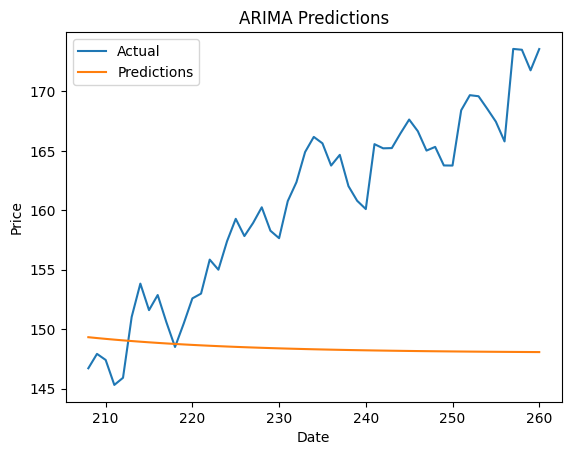

In [16]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


# Perform date-wise splitting
train_size = int(len(df) * 0.8)
train_data = df[:train_size]
test_data = df[train_size:]

# Perform numerical-wise splitting
# train_size = int(len(df) * 0.8)
# train_data = df.iloc[:train_size]
# test_data = df.iloc[train_size:]

# Create ARIMA model
model = ARIMA(train_data['Adj Close'], order=(1, 0, 0))
model_fit = model.fit()

# Make predictions on the test data
predictions = model_fit.predict(start=len(train_data), end=len(df)-1)

# Evaluate the model
mse = mean_squared_error(test_data['Adj Close'], predictions)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Plot predictions and actual values
import matplotlib.pyplot as plt

plt.plot( test_data['Adj Close'], label='Actual')
plt.plot( predictions, label='Predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('ARIMA Predictions')
plt.legend()
plt.show()
